# FFT

In [239]:
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

In [187]:
%matplotlib inline

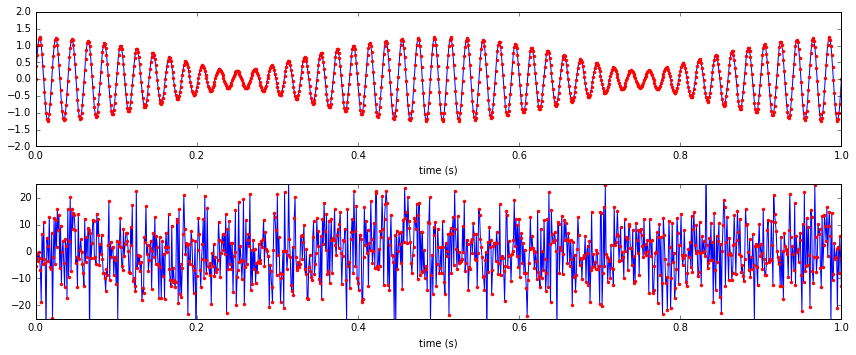

In [364]:
# Sampling data
s_time = 100
s_rate = 1000
s_nr = s_rate * s_time 

# frequencies
a0 = 0.75
f0 = 49

a1 = 0.5
f1 = 51

x = np.linspace(0, s_time, s_nr)
y = a0  * np.sin(2 * np.pi * x * f0) + a1 * np.sin(2 * np.pi * x * f1)

fig, axs = plt.subplots(2,1,figsize=(12, 5))
axs[0].plot(x, y)
axs[0].plot(x, y, color='red', ls='', marker='.')
axs[0].set_ylim(-2, 2)

x = np.linspace(0, s_time, s_nr)
y = a0  * np.sin(2 * np.pi * x * f0) + a1 * np.sin(2 * np.pi * x * f1) +  10 * np.random.normal(size=s_nr)
axs[1].plot(x, y)
axs[1].plot(x, y, color='red', ls='', marker='.')
axs[1].set_ylim(-25, 25)

for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_xlabel('time (s)')
    
plt.tight_layout()

Few basics on discret FFTs:

* maximum frequency: sampling_rate / 2 = 500Hz
* freqeuncy resolution: 1 / sampling_time = 1/ 100 = 0.01


In [377]:
%matplotlib inline

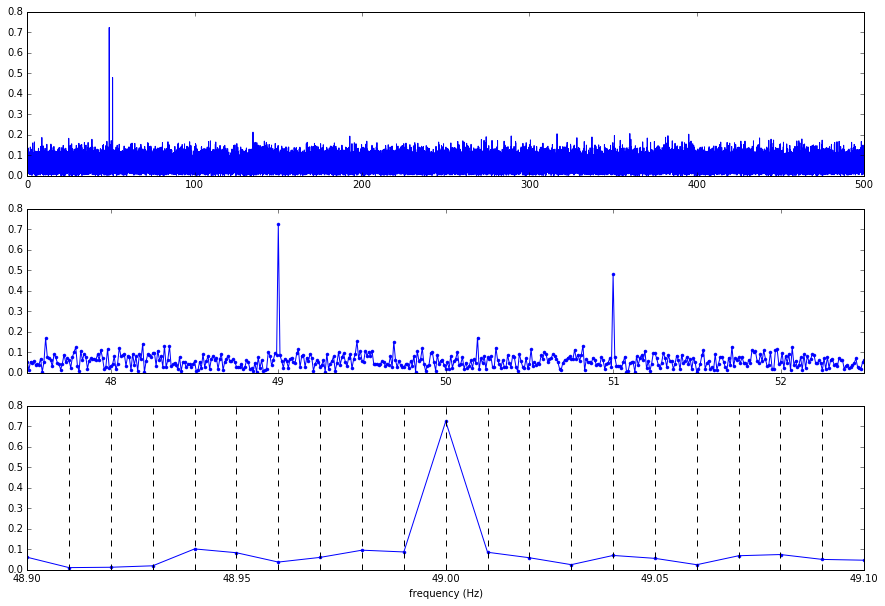

In [378]:
y_fft = fft(y)
freqs = fftfreq(s_nr, 1 / s_rate)
mask = freqs > 0

fig, axs = plt.subplots(3, 1, figsize=(15, 10))
axs[0].plot(freqs[mask], 2 / s_nr * np.abs(y_fft[mask]))

axs[1].plot(freqs[mask], 2 / s_nr * np.abs(y_fft[mask]), marker='.')
axs[1].set_xlim(47.5, 52.5)

axs[2].plot(freqs[mask], 2 / s_nr * np.abs(y_fft[mask]), marker='.')
axs[2].set_xlim(48.9, 49.1)

axs[2].set_xlabel('frequency (Hz)')

for pos in np.arange(48.9, 49.1, 1 / s_time):
    axs[2].axvline(pos, ls='--', color='black')

## Inverse FFT

In [380]:
freqs > 0

array([False,  True,  True, ..., False, False, False], dtype=bool)

/home/tw/.anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 1)

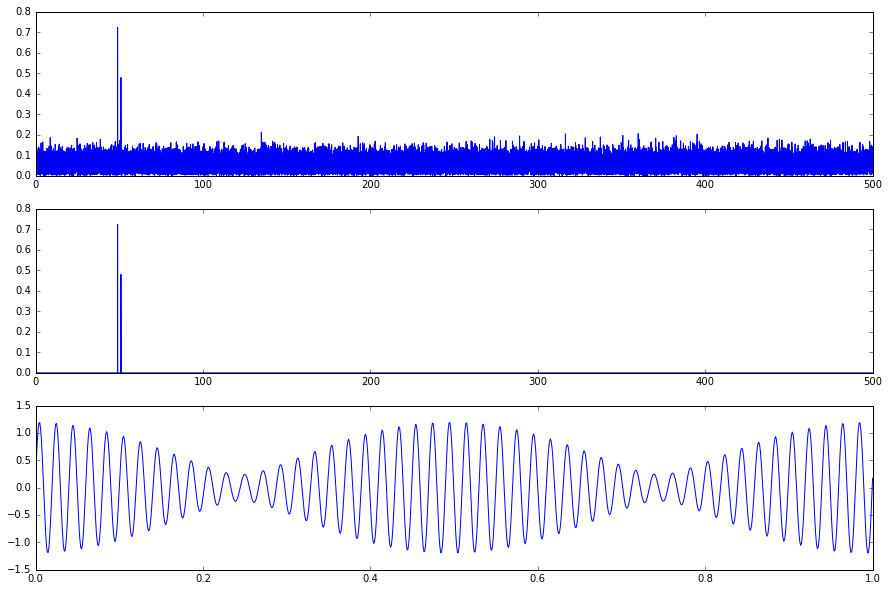

In [381]:
# Create simple background noise filter
freq_filter = 2 / s_nr * np.abs(y_fft) < 0.3
y_fft_filtered = y_fft.copy()
y_fft_filtered[freq_filter] = 0

# Reverse FFT on filtered data
y_filtered = ifft(y_fft_filtered)

mask = freqs > 0
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

axs[0].plot(freqs[mask], 2 / s_nr * np.abs(y_fft[mask]))
axs[1].plot(freqs[mask], 2 / s_nr * np.abs(y_fft_filtered[mask]))

axs[2].plot(x, y_filtered)
axs[2].set_xlim(0, 1)